In [1]:
config_name = 'ps256_th_varynoise'
full_or_patch  = 'patch'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

import sys
sys.path.insert(1, '/home/quahb/caipi_denoising/src')

from utils.data_io import load_dataset, load_patches

dataset_folder = os.path.join('/home/quahb/caipi_denoising/data/datasets/', config_name)

In [3]:
# LOAD FIRST N SLICES
X = load_patches('X', dataset_folder, load_n_slices=500)
y = load_patches('y', dataset_folder, load_n_slices=500)

# LOAD WHOLE DATASET
# X, y = load_dataset(dataset_folder)

y: 100%|█████████████████████████████████████| 500/500 [00:01<00:00, 330.65it/s]


In [4]:
X.shape, y.shape

((4500, 256, 256, 1), (4500, 256, 256, 1))

In [5]:
def plot_patches(X, img_i=0):
    '''
    plot first row * col patches which form a single image
    '''
    rows = 5
    cols = 5

    figure, axis = plt.subplots(rows, cols, figsize=(28,7 * rows))
    print(f'Showing {rows * cols}/{len(X)} patches')
    for i in range(rows):
        for j in range(cols):
            slc = X[img_i]
            axis[i, j].imshow(slc, cmap='gray')
            label = 'min: {:.3f}, max: {:.3f}, mean: {:.3f}, std: {:.3f}'.format(np.min(slc), np.max(slc), np.mean(slc), np.std(slc))
            axis[i, j].set(xlabel=label)
            axis[i, j].set_title(f'Patch {img_i}')
            img_i += 1

    plt.show()
    
def plot_slices(X):
    '''
    plot first row * col full slices
    '''
    slc_i = 100 # initial slice to start from

    rows = 6
    cols = 2

    figure, axis = plt.subplots(rows, cols, figsize=(18,50))
    for i in range(rows):
        for j in range(cols):
            axis[i, j].imshow(X[slc_i], cmap='gray')
            slc_i += 1

# Plot images, labels

In [6]:
img_i=3625
print(X.shape)

(4500, 256, 256, 1)


Showing 25/4500 patches


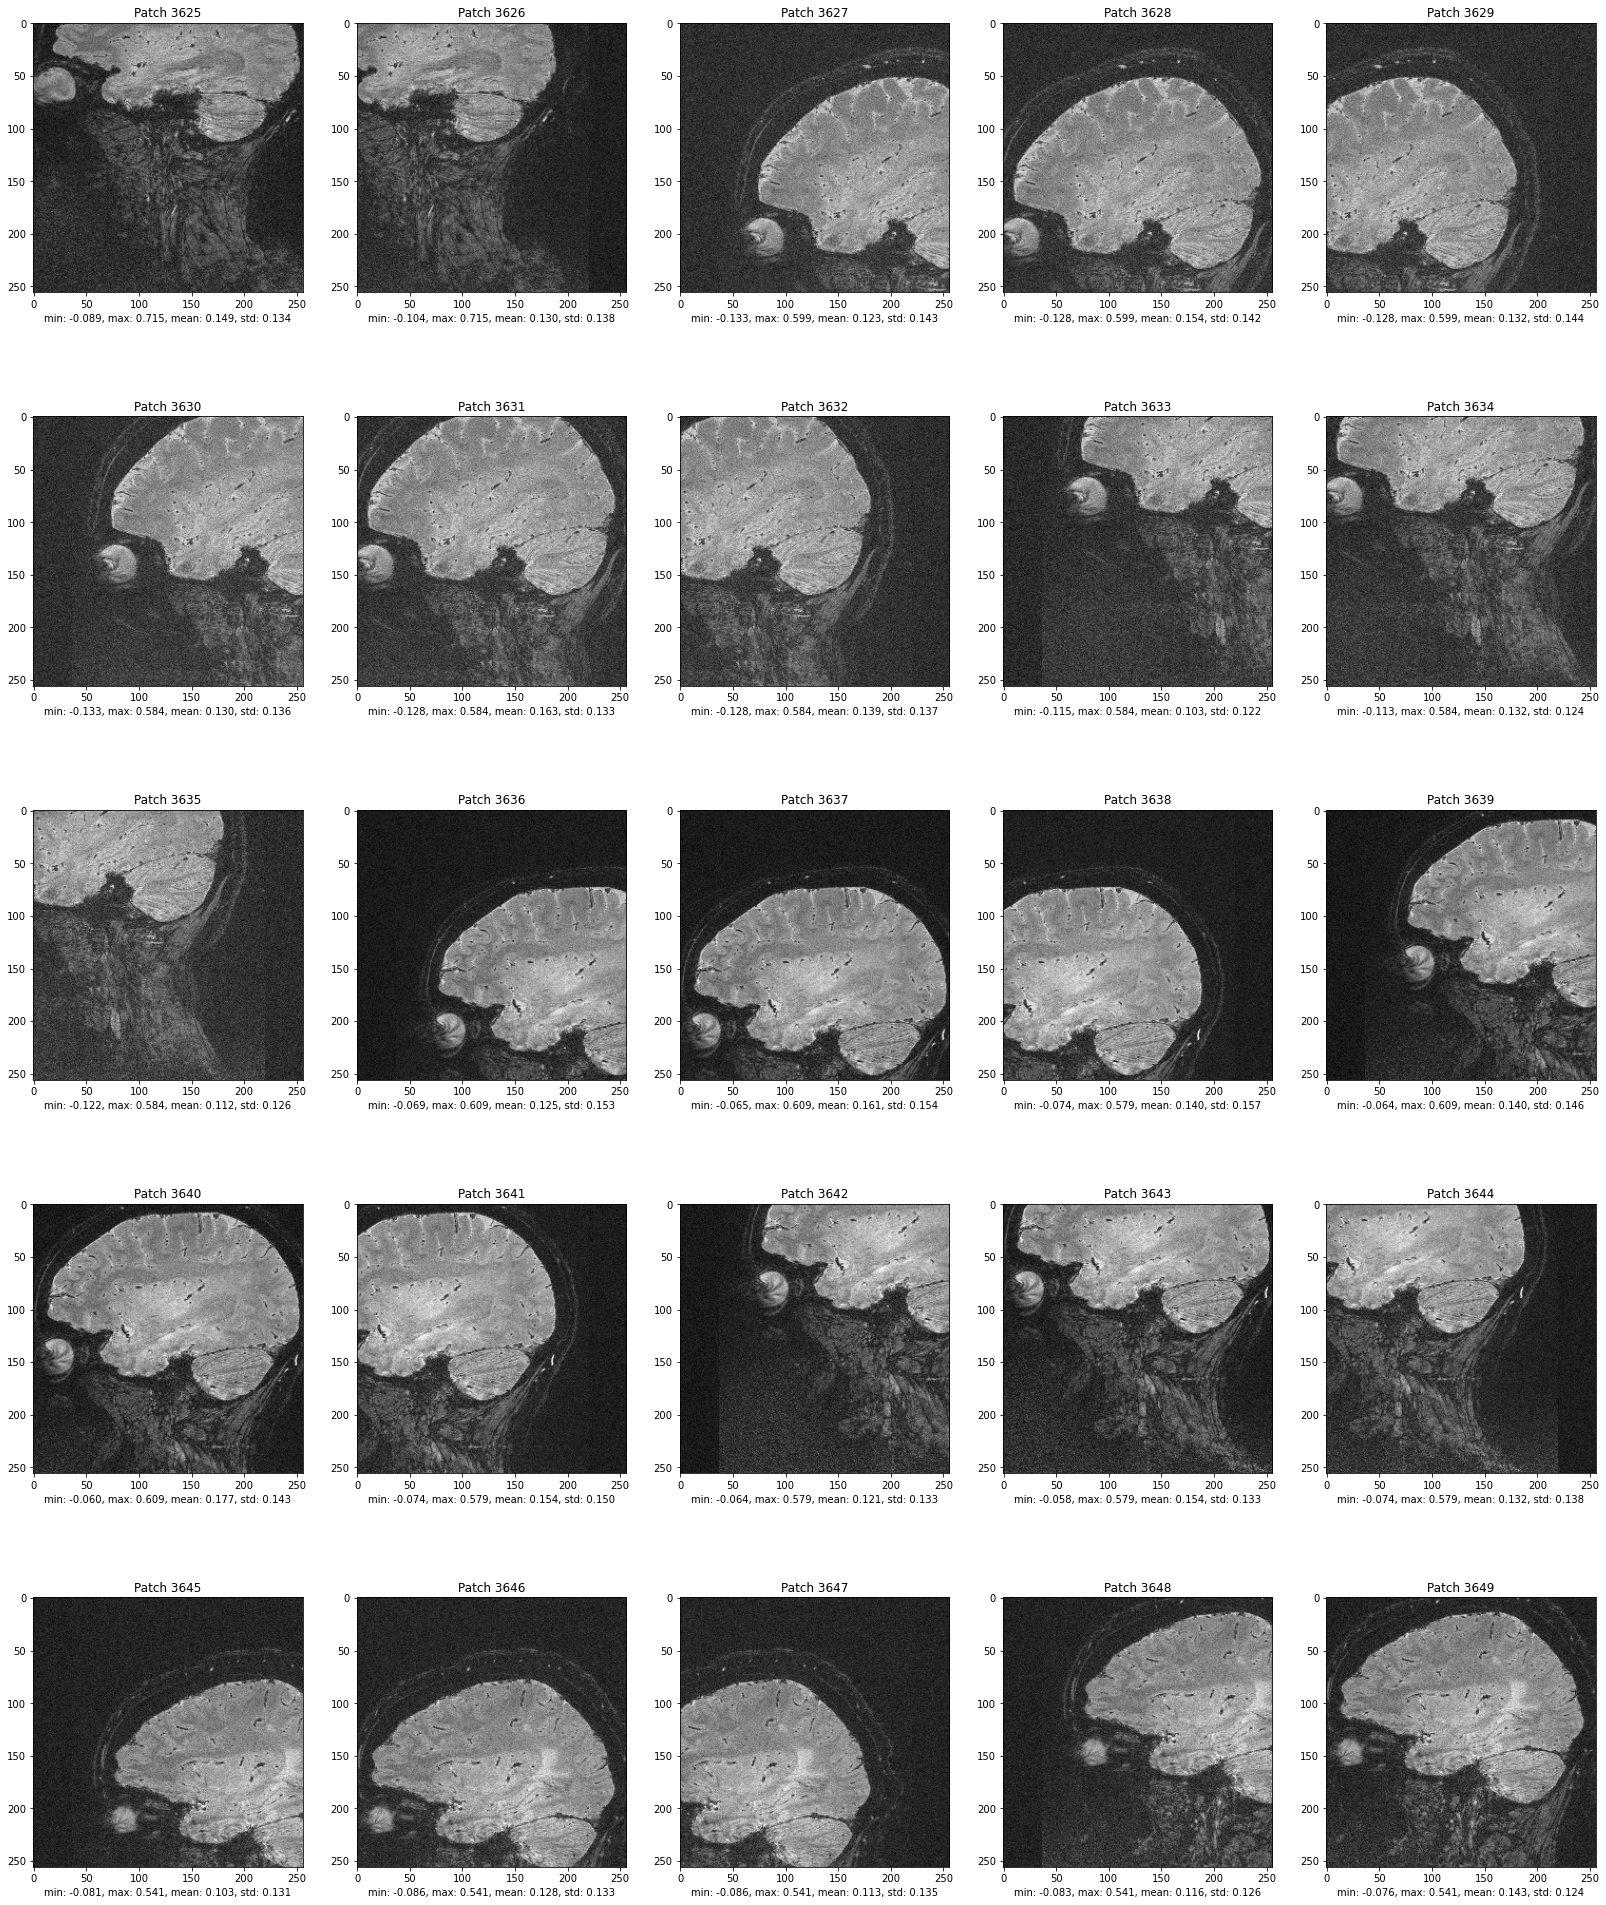

In [7]:
if full_or_patch == 'full':
    plot_slices(X)
else:
    plot_patches(X, img_i=img_i)

Showing 25/4500 patches


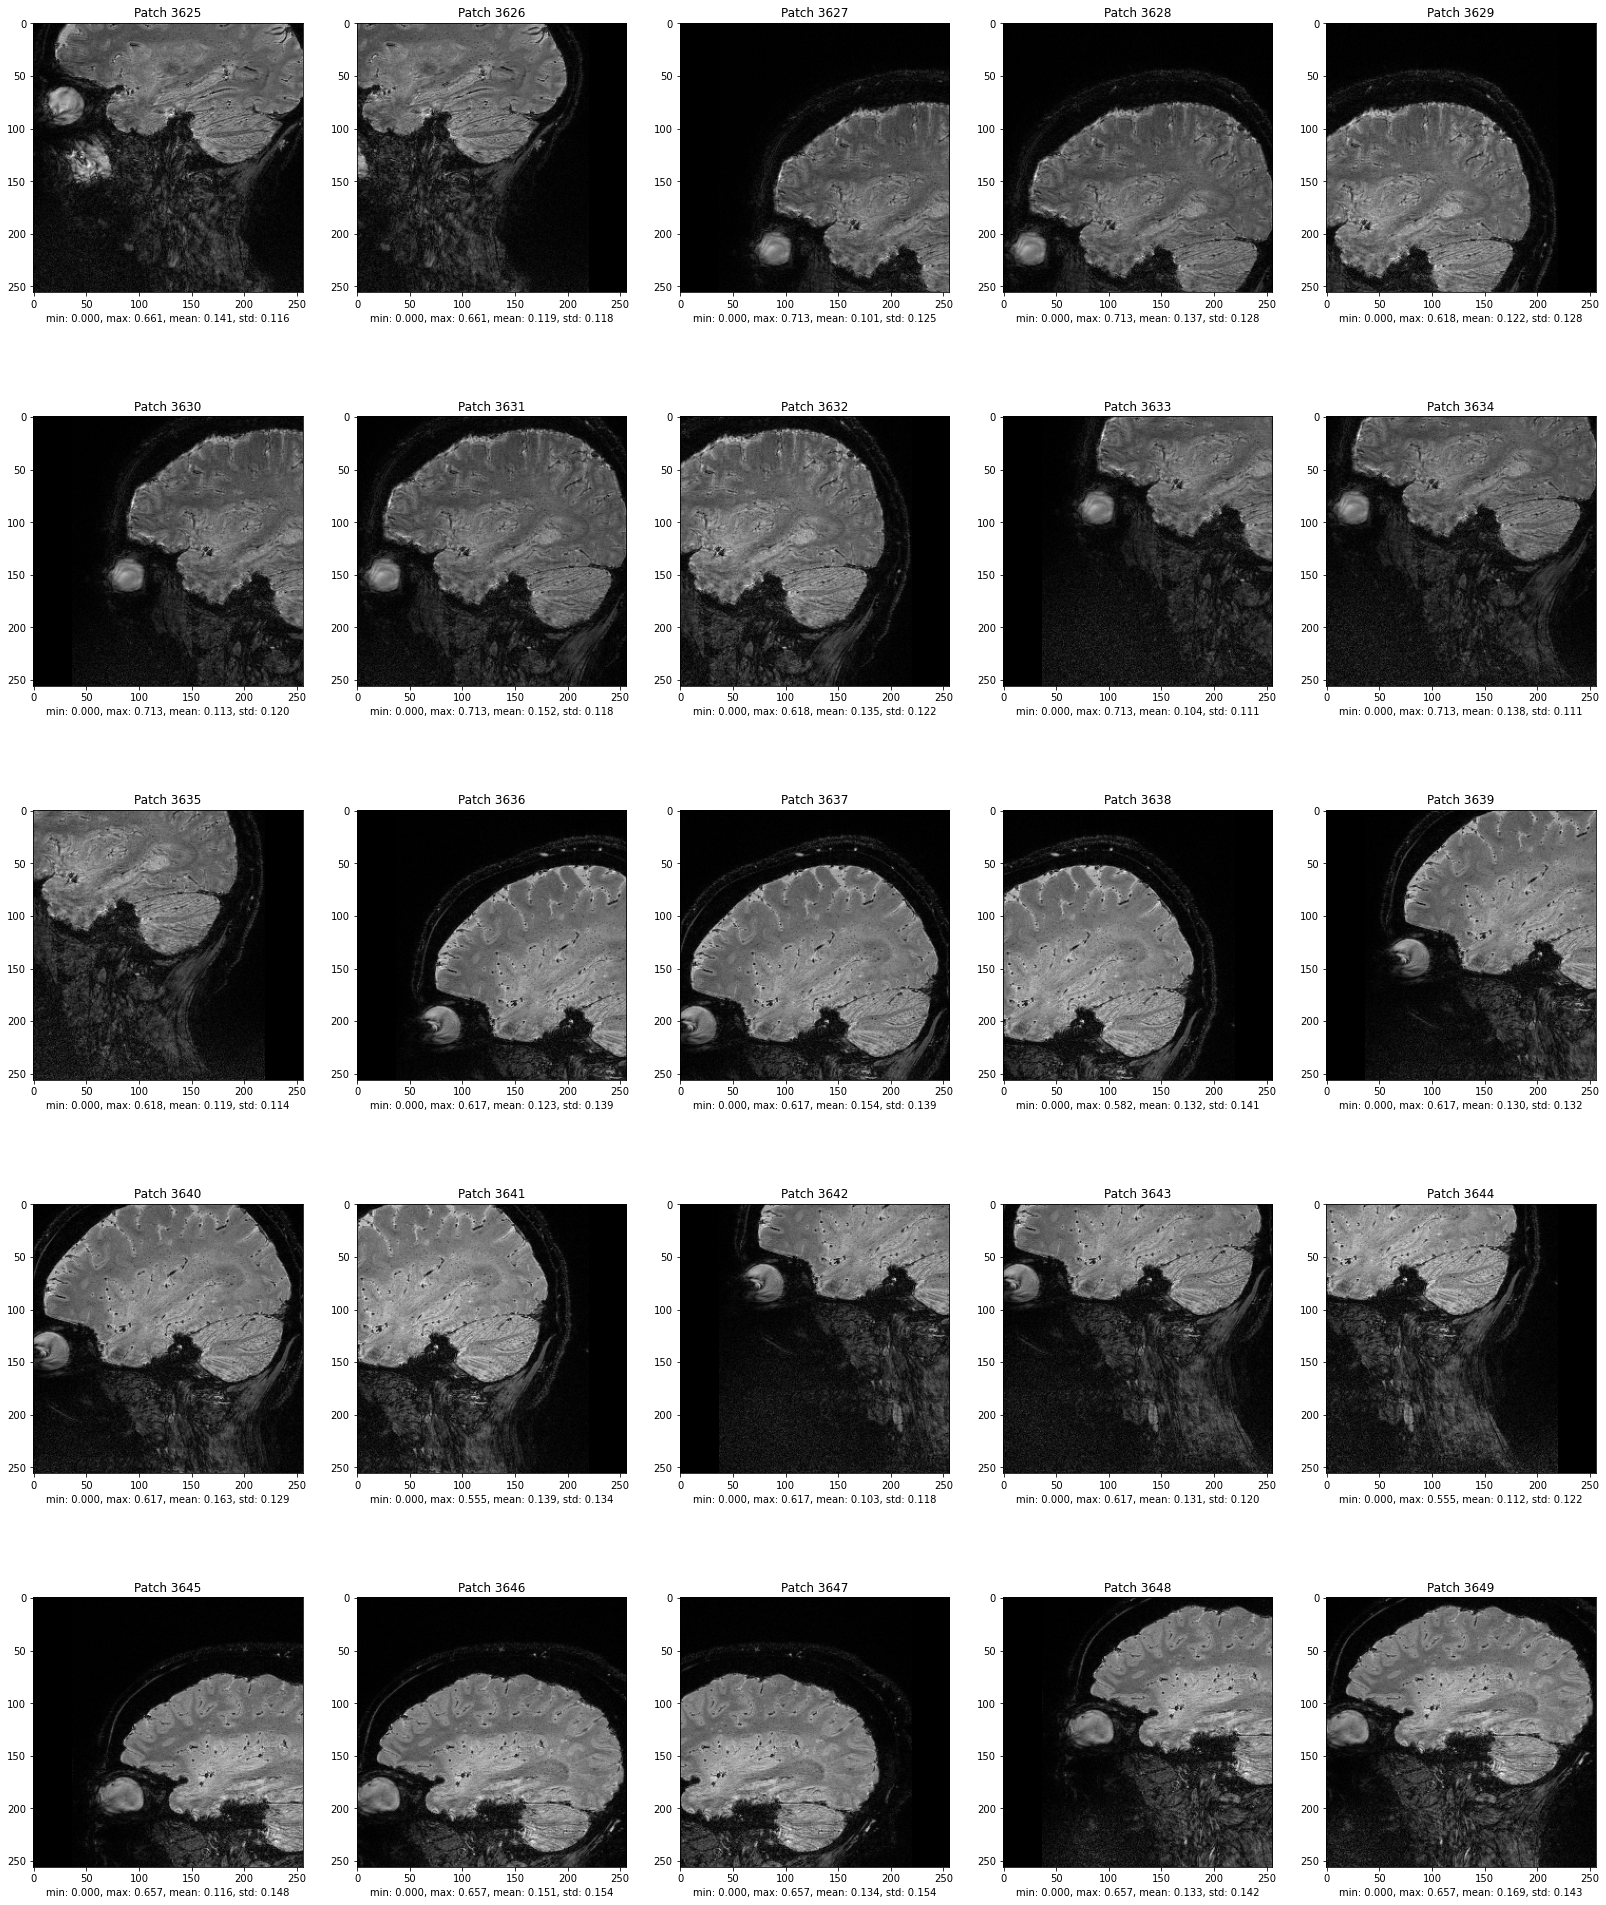

In [8]:
if full_or_patch == 'full':
    plot_slices(y)
else:
    plot_patches(y, img_i=img_i)

Showing 4/4500 patches


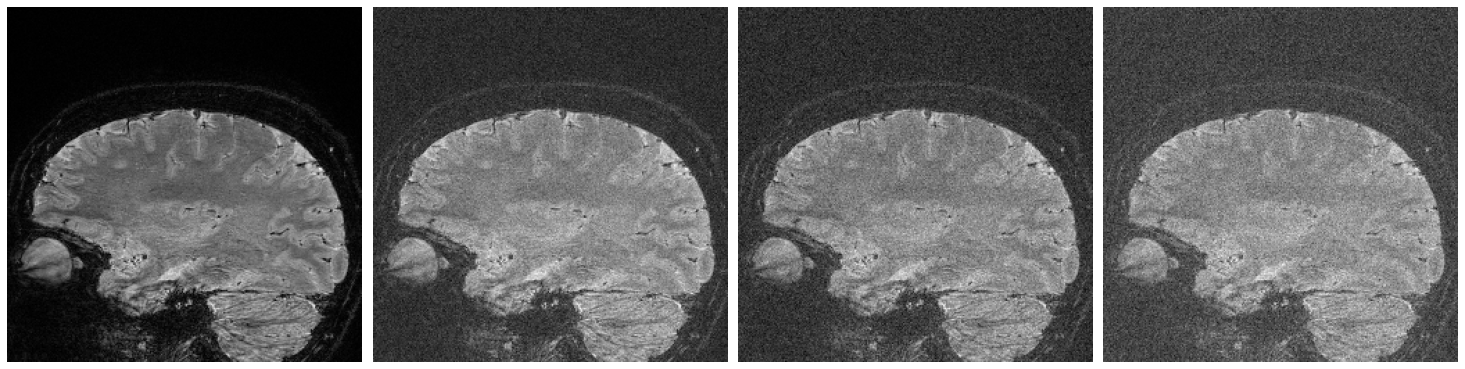

In [35]:
rows = 1
cols = 4
img_i = 3601

figure, axis = plt.subplots(rows, cols, figsize=(26,8 * rows))
print(f'Showing {rows * cols}/{len(y)} patches')
for i in range(rows):
    for j in range(cols):
        if j == 0:
            noise_map = np.random.normal(0, 0, y[img_i].shape)
        elif j == 1:
            noise_map = np.random.normal(0, 0.03, y[img_i].shape)
        elif j == 2:
            noise_map = np.random.normal(0, 0.04, y[img_i].shape)
        elif j == 3:
            noise_map = np.random.normal(0, 0.05, y[img_i].shape)
        slc = y[img_i] + noise_map
        axis[j].imshow(slc, cmap='gray')
        axis[j].axis('off')

plt.subplots_adjust(wspace=0.03, hspace=0)
plt.savefig('sample_patches.png', bbox_inches='tight')
plt.show()